<a href="https://colab.research.google.com/github/dkbcastro/THV-TX_155/blob/master/Castro_Lab_Assignment_Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Castro, Denise Kyla\
_Student No._: 2022-10832\
_Section_: THV-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: October 19, 2024 and 4:01

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Denise Kyla B. Castro

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


**CODE AND DISCUSSION**

To calculate the coefficients in the discrete Fourier transforms (DFT) given the modulated sine wave

$$ \begin{equation}
y_n = sin(\pi n/N)sin(20\pi n/N),
\end{equation} $$

consider first the standard equation for the DFT

$$ \begin{equation}
c_k = \sum_{n=0}^{N-1} y_nexp(-i\frac{2\pi kn}{N}),
\end{equation} $$

where $y_n$ is the input signal in the time domain, $k$ is the frequency index, $n$ is thetime index, and $N$ is the total number of samples in $y_n$. This equation calculates the Fourier coefficients.

In the code for #1, a for loop was utilized to initialize $y_n$ for 1000 evenly spaced sample points. Then, $c_k$ was evaluated by defining the function `dft(y)` which computes the Fourier transform using nested loops. For the outer loop, the frequency runs from 0 to N/2. The symmetry in real-valued signals allows for computing only the first `N/2+1` coefficients to reduce computation time and memory usage. For the inner loop, it runs over each sample n iterating from 0 to N-1. This nested loop ensures that for each frequency $k$, the DFT sums over all time-domain samples $n$ to obtain the Fourier coefficients.

For #2, to get the amplitude, the absolute value of $c_k$ was used.

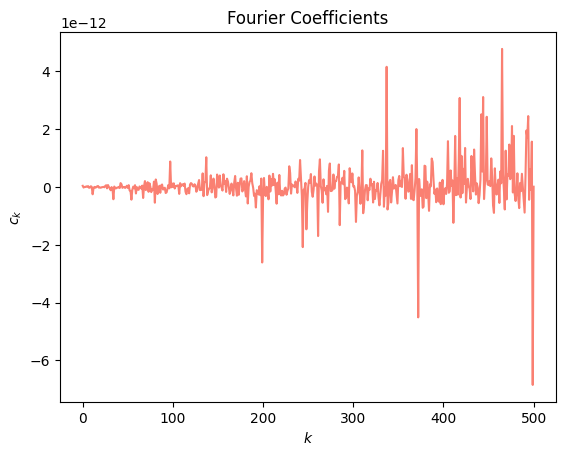

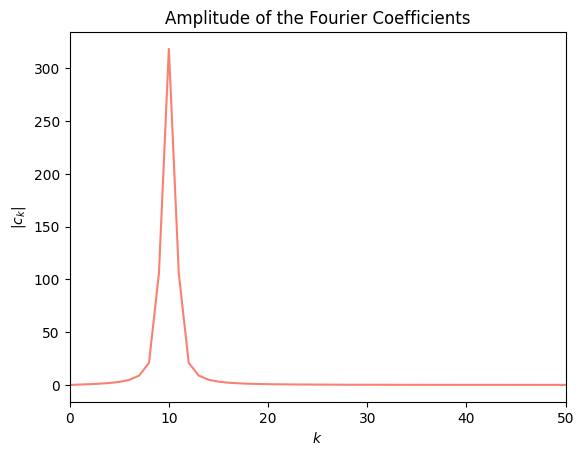

In [188]:
import numpy as np                                          # library for arrays
import matplotlib.pyplot as plt                             # library for plots
from math import sin, pi, exp                               # imports the functions sine, pi, and exp


# 1

N = 1000                                                    # number of evenly spaced sample points

y = np.zeros(N)                                             # array of zeros with 1000 elements
for n in range(N):                                          # computes the modulated sine wave for each sample n
    y[n] = sin(pi*n/N) * sin(20*pi*n/N)                     # stores modulated sine wave

def dft(y):                                                 # computes the Discrete Fourier Transform (DFT)
    c = np.zeros(N//2+1,complex)                            # array of zeros that will store Fourier Coefficients (only half because the signal is real-valued)
    for k in range(N//2+1):                                 # loops over the frequency bins (only need half for real signals)
        for n in range(N):                                  # sums over all sample points n
            c[k] += y[n] * np.exp(-2j*pi*k*n/N)             # computes DFT for each frequency k
    return c                                                # returns the fourier coefficients of y to array c

c_k = dft(y)                                                # stores the computed fourier coefficients

plt.plot(c_k,'Salmon')                                      # plots the real part of the Fourier coefficients
plt.xlabel("$k$")                                           # x-label
plt.ylabel("$c_k$")                                         # y-label
plt.title("Fourier Coefficients")                           # title
plt.show()                                                  # shows plot


# 2

# plot the amplitude
plt.plot(abs(c_k), 'Salmon')                                # plots the amplitudes of the fourier coefficients
plt.xlabel("$k$")                                           # x-label
plt.ylabel("$|c_k|$")                                       # y-label
plt.title("Amplitude of the Fourier Coefficients")          # title
plt.xlim(0, 50)                                             # scales plot
plt.show()                                                  # shows plot

The first plot shows the real part of the Fourier coefficients given the modulated sine wave $y_n$. Since $y_n$ is primarily composed of sine waves, which contribute to the imaginary part of the Fourier transform, the real part remains close to zero with some fluctuations due to small contributions from cosine terms.

For #2, it shows the plot of the amplitude of the fourier coefficients. It can be seen that there is a peak at $k = 10$ and sidebands at around $k = 9$ and $k = 11$ caused by the modulation of the two sine waves in the signal.

To further discuss this, we take note that $y_n$ is a combination of two sine waves. The general form of this signal can be described as,

$$ \begin{equation}
y_n = sin(2\pi k_{1}n/N)sin(2\pi k_{2}n/N),
\end{equation} $$

where $k_1$ is the first frequency and $k_2$ is the second frequency.

If $f_1 = f_2$, the signal reduces to a single frequency sine wave, resulting in only one peak. However, if the values of $f_1$ and $f_2$ are distinct from one another, then it will result in two distinct peaks. These behaviors can be visualized in the graphs below.

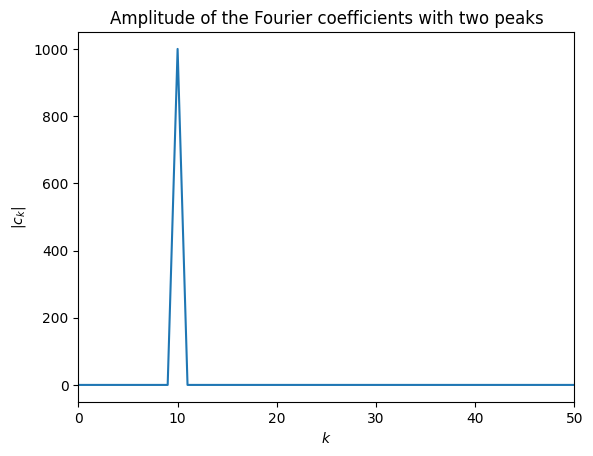

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

N = 1000
k1 = 10
k2 = 10
y = np.zeros(N)

for n in range(N):
    y[n] = np.sin(2*pi*k1*n/N) + np.sin(2*pi*k2*n/N)  # change frequency values

def dft(y):
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n] * np.exp(-2j*pi*k*n/N)
    return c

ck = dft(y)

plt.plot(abs(ck))
plt.ylabel("$|c_k|$")
plt.xlabel("$k$")
plt.title("Amplitude of the Fourier coefficients with two peaks")
plt.xlim(0, 50)
plt.show()

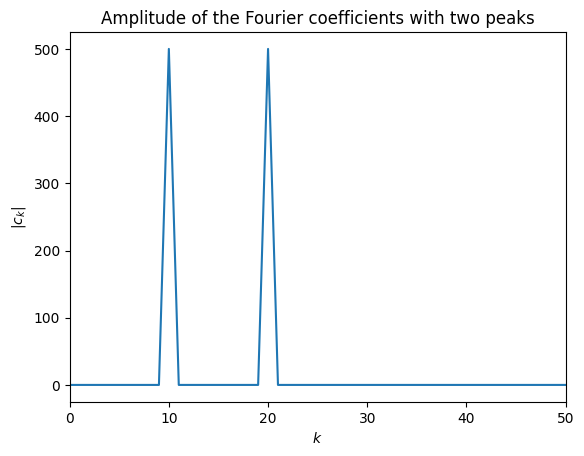

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

N = 1000
k1 = 20
k2 = 10
y = np.zeros(N)

for n in range(N):
    y[n] = np.sin(2*pi*k1*n/N) + np.sin(2*pi*k2*n/N)  # change frequency values

def dft(y):
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n] * np.exp(-2j*pi*k*n/N)
    return c

ck = dft(y)

plt.plot(abs(ck))
plt.ylabel("$|c_k|$")
plt.xlabel("$k$")
plt.title("Amplitude of the Fourier coefficients with two peaks")
plt.xlim(0, 50)
plt.show()

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [191]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [192]:
!ls drive/My\ Drive/

'10 (1).png'
'10 (2).png'
 10.png
 11.png
 13C4E80A-5267-42FB-BA67-B48F74303DAF.jpeg
'1 acad oval (Apr 22, 2023 at 12:24 PM)'
'1 acad oval (Apr 22, 2023 at 2:29 PM)'
'1 acad oval (Apr 22, 2023 at 2:53 PM)'
'1C-01 Narag et al.pdf'
'1C-04 Rubio et al.pdf'
'1F-01 Saloma et al.pdf'
'1st Semester'
 202210832-22026837-PaymentSlip.pdf
 274362298_362948735489187_668838294918624644_n.jpg
 2EDB8064-FE9B-4169-A023-1F8319AA0E27.jpeg
'2nd Semester'
'2ND YEAR'
 4005A28E-7F30-4345-921C-E5A9289074DD.jpeg
'4C-06 Principe et al.pdf'
 58484E24-FBE2-453D-9A11-49A369E99555.jpeg
 58CE8A73-2805-486F-8FF4-6FAB5DACDA69.jpeg
 5995381D-7560-4C0E-B469-AAFD6F198B68.jpeg
 6C10147A-3598-4FF8-942D-279D99DA3ADA.jpeg
 8.png
 9.png
'Agreement Form (2nd Sem 22-23) - CASTRO.pdf'
 AP155
'AP181 TECH PAPERS'
 B7A34BD3-F124-4AB5-BDE8-4E5940B943E8.jpeg
'BALAYAN_1 (1).png'
'BALAYAN_1 (2).png'
 BALAYAN_1.png
'BALAYAN_2 (1).png'
'BALAYAN_2 (2).png'
 BALAYAN_2.png
'BALAYAN_3 (1).png'
'BALAYAN_3 (2).png'
 BALAYAN_3.png
 BOOKS
 bott

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [193]:
file_path = "/content/drive/My Drive/AP155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [194]:
import numpy as np
dow = np.loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [195]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

For #1, the plot of the data is given by the code below.

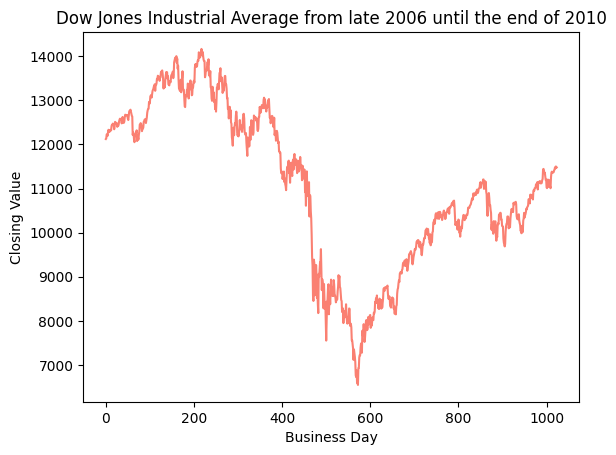

In [196]:
# 1. Plot graph
plt.plot(dow, 'Salmon')                                                             # line plot of data
plt.xlabel("Business Day")                                                          # x-label
plt.ylabel("Closing Value")                                                         # y-label
plt.title("Dow Jones Industrial Average from late 2006 until the end of 2010")      # title
plt.show()                                                                          # shows plot

For#2, to calculate the DFT coefficients, we make use of the rfft function from numpy's fft library. To plot this, we take the absolute value of the coefficients to get the amplitude.

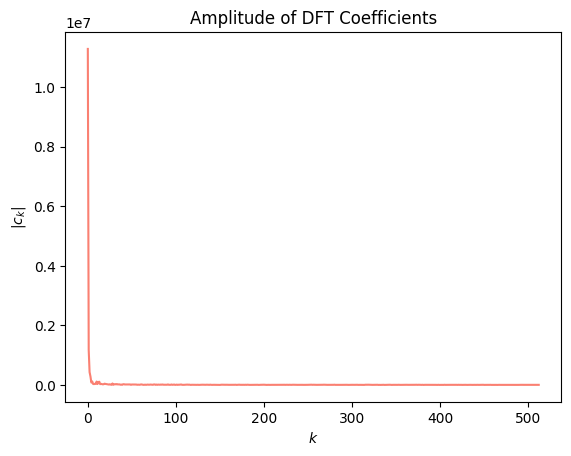

In [197]:
# 2. DFT Coefficients

c_k = np.fft.rfft(dow)                          # calculates the DFT coefficients

plt.plot(abs(c_k), 'Salmon')                    # line plot of the magnitude of DFT coefficients
plt.xlabel("$k$")                               # x-label
plt.ylabel("$|c_k|$")                           # y-label
plt.title("Amplitude of DFT Coefficients")      # title
plt.show()                                      # shows plot

If we zoom in closely, the graph shows some spikes at the beginning and quickly fell off near zero suggesting that the data is contained in low-frequency components.

For #3, we use `L = len(c_k)//10 + 1` to get the index of the first 10% of the coefficients. Then, `c_k2[L:]` = 0 was used to set the remaining 90% to zero.



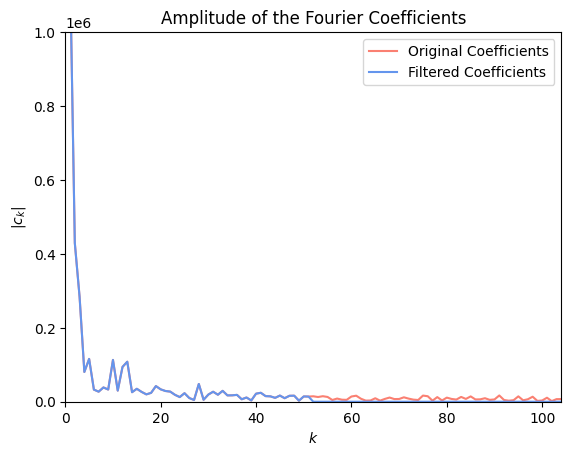

In [198]:
#3. Filter 10%
L = len(c_k)//10 + 1                                                            # calculates the index of the first 10%

c_k2 = np.copy(c_k)                                                             # copies c_k
c_k2[L:] = 0                                                                    # set coefficients after the first 10% to zero

# Compares the original coefficients and filtered coefficients
plt.plot(abs(c_k), label = "Original Coefficients", c='salmon')                 # plots the original coefficients
plt.plot(abs(c_k2), label = "Filtered Coefficients", c='cornflowerblue')        # plots the filtered coefficients
plt.xlabel("$k$")                                                               # x-label
plt.ylabel("$|c_k|$")                                                           # y-label
plt.xlim(0, 2*L)                                                                # sets x-limit
plt.ylim(0, 1e6)                                                                # sets y-limit
plt.title("Amplitude of the Fourier Coefficients")                              # title
plt.legend()                                                                    # show legends
plt.show()                                                                      # show plots

This plot shows the comparison of the original (pink) and the filtered (blue) coefficients. Here, we see that in the filtered plot that it has removed the higher frequency components.

For #4, we use the inverse transform function `irfft` from `numpy`'s `fft` library.

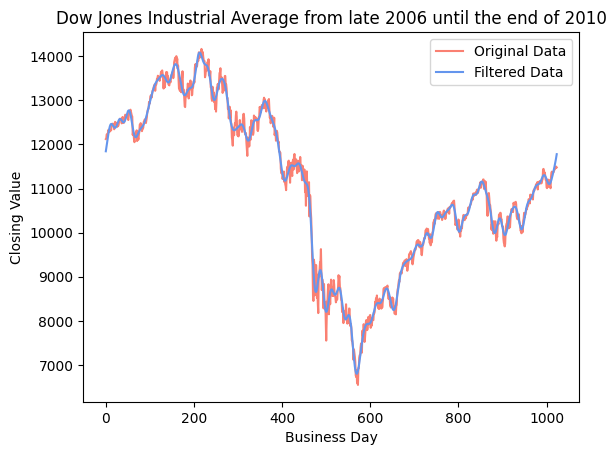

In [199]:
#4. Inverse Fourier Transform

filtered_dow = np.fft.irfft(c_k2)                                                   # calculates the inverse fourier transform of the filtered coefficients

# Compares the original coefficients and filtered coefficients
plt.plot(dow, label='Original Data', c='salmon')                                    # plots the original data
plt.plot(filtered_dow, label='Filtered Data', c='cornflowerblue')                   # plots the new filtered data
plt.xlabel("Business Day")                                                          # x-label
plt.ylabel("Closing Value")                                                         # y-label
plt.title("Dow Jones Industrial Average from late 2006 until the end of 2010")      # title
plt.legend()                                                                        # show legends
plt.show()                                                                          # show plots

The graph shows the comparison between the original data (pink) and the new data (blue). Here, we can see that the new data is smoother, as the high-frequency fluctuations have been removed. This highlights the meaningful trends while filtering out less significant frequencies, effectively reducing noise.

For further discussion, if we were to retain 50% of the original Fourier coefficients (instead of filtering out 90%), the resulting data would be less smooth. This is because more high-frequency components, which often correspond to noise or rapid oscillations, would remain in the signal. The retained high-frequency components would cause the signal to exhibit more sharp variations, making it closer to the unsmoothed, original data. This can be visualized through the graph below.

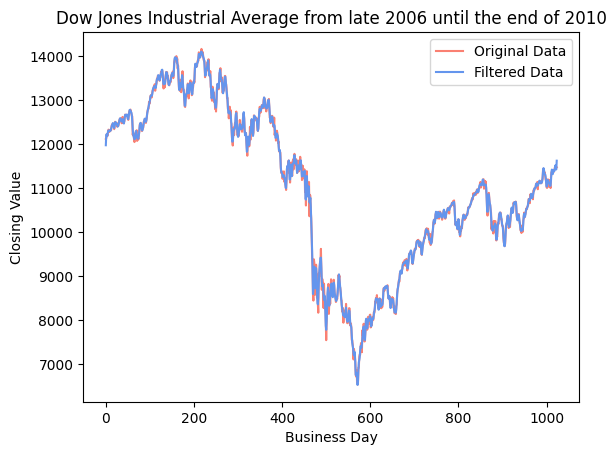

In [200]:
L = len(c_k)//2 + 1       # calculates the index of the first 50%

c_k2 = np.copy(c_k)       # copies c_k
c_k2[L:] = 0              # set coefficients after the first 50% to zero

filtered_dow = np.fft.irfft(c_k2)                                                   # calculates the inverse fourier transform of the filtered coefficients

plt.plot(dow, label='Original Data', c='salmon')                                    # plots the original data
plt.plot(filtered_dow, label='Filtered Data', c='cornflowerblue')                   # plots the new filtered data
plt.xlabel("Business Day")                                                          # x-label
plt.ylabel("Closing Value")                                                         # y-label
plt.title("Dow Jones Industrial Average from late 2006 until the end of 2010")      # title
plt.legend()                                                                        # show legends
plt.show()